In [5]:
import pandas as pd
from sklearn.datasets import make_blobs
import numpy as np
X, y = make_blobs(n_samples=2000, n_features=3, random_state=0)

In [6]:
X.shape

(2000, 3)

In [7]:
X = pd.DataFrame(X)

In [8]:
y = pd.DataFrame(y)

In [9]:
df = pd.concat([X,y], axis = 1)

In [10]:
df.head()

,0,1,2,0
0,0.378197,-0.822654,4.412505,1
1,0.112908,8.072768,9.914998,2
2,1.875986,-2.862337,1.955307,1
3,-1.210594,6.876798,9.223306,2
4,2.095730,3.335208,3.288496,0


In [11]:
df.columns = ["A", "B", "C", "y"]

In [12]:
df.head()

,A,B,C,y
0,0.378197,-0.822654,4.412505,1
1,0.112908,8.072768,9.914998,2
2,1.875986,-2.862337,1.955307,1
3,-1.210594,6.876798,9.223306,2
4,2.095730,3.335208,3.288496,0


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
A,2000.0,0.240772,1.420266,-4.365209,-0.758331,0.381250,1.244579,4.077801
B,2000.0,3.493821,4.002951,-5.351844,-0.964595,4.278380,7.137660,11.046691
C,2000.0,4.739933,3.407143,-1.459501,2.115543,3.208216,8.649354,12.079492
y,2000.0,0.999500,0.816599,0.000000,0.000000,1.000000,2.000000,2.000000


In [14]:
import seaborn as sns
sns.pairplot(df);

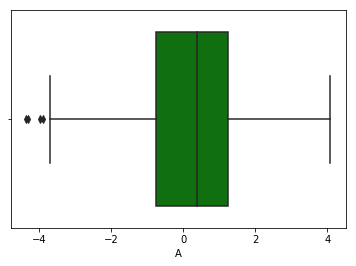

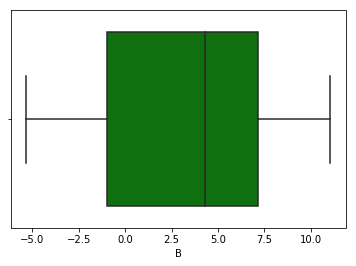

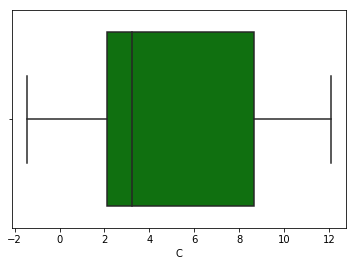

In [15]:
import matplotlib.pyplot as plt
liste = ["A", "B", "C"]
for i in liste:
    sns.boxplot(df[i], color = "green")
    plt.show()
    

In [16]:
import numpy as np
from scipy import stats
z = np.abs(stats.zscore(df))
z

array([[9.67842105e-02, 1.07859280e+00, 9.61244268e-02, 6.12449111e-04],
       [9.00502040e-02, 1.14417860e+00, 1.51926700e+00, 1.22551067e+00],
       [1.15163195e+00, 1.58826505e+00, 8.17495024e-01, 6.12449111e-04],
       ...,
       [9.45044461e-01, 1.00466412e+00, 7.00077249e-01, 6.12449111e-04],
       [8.97424726e-01, 1.25494356e+00, 1.41095478e+00, 1.22551067e+00],
       [1.42912074e+00, 1.50338438e+00, 8.76119277e-01, 6.12449111e-04]])

In [17]:
z_ = len(np.where(z>3)[0])
z_

2

In [18]:
X = df[["A", "B", "C"]]

In [19]:
y = df.y


In [20]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42 )

In [21]:
# DECISION TREE
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier().fit(X_train, y_train)

In [22]:
model.score(X_train,y_train)

1.0

In [23]:
model.score(X_test,y_test)

0.9966666666666667

TUNING

In [25]:
from sklearn.model_selection import GridSearchCV
params = {"min_samples_split": range(2,50), "max_depth": range(1,10)}
model_cv = GridSearchCV(model, params, cv = 10, n_jobs = -1).fit(X_train, y_train)


In [26]:
model_cv.best_params_



{'max_depth': 2, 'min_samples_split': 2}

In [27]:
model_tuned = DecisionTreeClassifier(max_depth = 2, min_samples_split = 2).fit(X_train, y_train)

In [28]:
model_tuned.score(X_train,y_train)

1.0

In [30]:
model_tuned.score(X_test,y_test)

0.9966666666666667

In [31]:
# XGBOOST
from xgboost import XGBClassifier
xgbm = XGBClassifier().fit(X_train, y_train)

C:\Users\User\Anaconda33\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
C:\Users\User\Anaconda33\lib\site-packages\distributed\config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [32]:
xgbm.score(X_train,y_train)

1.0

In [33]:
xgbm.score(X_test,y_test)

0.9966666666666667

TUNING

In [34]:
xgbm_params = {"learning_rate": [0.01, 0.1, 0.02, 0.05],
              "max_depth": [3,4,5,6],
              "n_estimators": [100,500,1000,2000]}
xgbm_cv = GridSearchCV(xgbm, xgbm_params, cv = 10, n_jobs = -1, verbose = 2).fit(X_train, y_train)
xgbm_cv.best_params_


Fitting 10 folds for each of 64 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   40.0s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed:  2.4min finished


{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}

In [35]:
xgbm_tuned = XGBClassifier(learning_rate = 0.01, n_estimators = 100, max_depth = 3).fit(X_train, y_train) 


In [36]:
xgbm_tuned.score(X_train,y_train)

1.0

In [37]:
xgbm_tuned.score(X_test,y_test)

0.9966666666666667

In [ ]:
"""Evaluation : Maybe because the original model was good enough, tuning did't make much of a difference. Since training model score is too high,
i'd suspect there might be overfitting but bias difference between training and test models are very low so I'd say we just have
 two working models, both XGBM and Decision Tree"""